<a href="https://colab.research.google.com/github/PhazeRoOman/DeepDTA/blob/Menna's-branch/unique_sequencsed_davis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.9 MB/s eta 0:00:00


In [4]:
import io
import time
import json
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [44]:
protein_dict = { "A": 1, "C": 2, "B": 3, "E": 4, "D": 5, "G": 6,
                "F": 7, "I": 8, "H": 9, "K": 10, "M": 11, "L": 12,
                "O": 13, "N": 14, "Q": 15, "P": 16, "S": 17, "R": 18,
                "U": 19, "T": 20, "W": 21,
                "V": 22, "Y": 23, "X": 24,
                "Z": 25 }
protein_dict_ = { 1: "A", 2: "C", 3: "B", 4: "E", 5: "D", 6: "G",
                7: "F", 8: "I", 9: "H", 10: "K", 11: "M", 12: "L",
                13: "O", 14: "N", 15: "Q", 16: "P", 17: "S", 18: "R",
                19: "U", 20: "T", 21: "W",
                22: "V", 23: "Y", 24: "X",
                25: "Z" }

In [6]:
data = loadmat('/content/drive/MyDrive/Colab Notebooks/davis.mat')
train_prots = data['train_prots']
val_prots = data['val_prots']
train_Y = data['train_Y'].T
val_Y = data['val_Y'].T
train_drugs = data['train_drugs']
val_drugs = data['val_drugs']

In [7]:
list_of_data = [train_prots, val_prots, train_Y, val_Y ,train_drugs, val_drugs ]
for i in range(0, len(list_of_data)):
  print (list_of_data[i].shape)

(20036, 1000)
(5010, 1000)
(20036, 1)
(5010, 1)
(20036, 100)
(5010, 100)


In [8]:
from transformers import BertForMaskedLM, BertTokenizer, pipeline
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False )
model = BertForMaskedLM.from_pretrained("Rostlab/prot_bert")
unmasker = pipeline('fill-mask', model=model, tokenizer=tokenizer)

Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
train_prots[0]

array([11.,  4., 16., 12., 10., 17., 12.,  7., 12., 10., 17., 16., 12.,
        6., 17., 21., 14.,  6., 17.,  6., 17.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6., 18., 16.,  4.,  6., 17., 16., 10.,  1.,  1.,
        6., 23.,  1., 14., 16., 22., 21., 20.,  1., 12.,  7.,  5., 23.,
        4., 16., 17.,  6., 15.,  5.,  4., 12.,  1., 12., 18., 10.,  6.,
        5., 18., 22.,  4., 22., 12., 17., 18.,  5.,  1.,  1.,  8., 17.,
        6.,  5.,  4.,  6., 21., 21.,  1.,  6., 15., 22.,  6.,  6., 15.,
       22.,  6.,  8.,  7., 16., 17., 14., 23., 22., 17., 18.,  6.,  6.,
        6., 16., 16., 16.,  2.,  4., 22.,  1., 17.,  7., 15.,  4., 12.,
       18., 12.,  4.,  4., 22.,  8.,  6.,  8.,  6.,  6.,  7.,  6., 10.,
       22., 23., 18.,  6., 17., 21., 18.,  6.,  4., 12., 22.,  1., 22.,
       10.,  1.,  1., 18., 15.,  5., 16.,  5.,  4.,  5.,  8., 17., 22.,
       20.,  1.,  4., 17., 22., 18., 15.,  4.,  1., 18., 12.,  7.,  1.,
       11., 12.,  1.,  9., 16., 14.,  8.,  8.,  1., 12., 10.,  1

In [10]:
sample = train_prots[0]
start_time = time.time()
samp_prot = ''
all_ = []
for i in range(0, len(sample)):
  if sample [i] ==0:
    break;
  #print (samp_prot)
  samp_prot = samp_prot + protein_dict_[sample[i]]
  samp_prot = samp_prot + ' '
print (samp_prot)

extractor = pipeline(model=model, task="feature-extraction", tokenizer=tokenizer)
result = extractor(samp_prot, return_tensors=True)

M E P L K S L F L K S P L G S W N G S G S G G G G G G G G G R P E G S P K A A G Y A N P V W T A L F D Y E P S G Q D E L A L R K G D R V E V L S R D A A I S G D E G W W A G Q V G G Q V G I F P S N Y V S R G G G P P P C E V A S F Q E L R L E E V I G I G G F G K V Y R G S W R G E L V A V K A A R Q D P D E D I S V T A E S V R Q E A R L F A M L A H P N I I A L K A V C L E E P N L C L V M E Y A A G G P L S R A L A G R R V P P H V L V N W A V Q I A R G M H Y L H C E A L V P V I H R D L K S N N I L L L Q P I E S D D M E H K T L K I T D F G L A R E W H K T T Q M S A A G T Y A W M A P E V I K A S T F S K G S D V W S F G V L L W E L L T G E V P Y R G I D C L A V A Y G V A V N K L T L P I P S T C P E P F A Q L M A D C W A Q D P H R R P D F A S I L Q Q L E A L E A Q V L R E M P R D S F H S M Q E G W K R E I Q G L F D E L R A K E K E L L S R E E E L T R A A R E Q R S Q A E Q L R R R E H L L A Q W E L E V F E R E L T L L L Q Q V D R E R P H V R R R R G T F K R S K L R A R D G G E R I S M P L D F K H 

In [12]:
#samp_prot =-7D L I P T S S K L V V  D T S L Q V K K A F F A L V T'
for i in range(0,len(samp_prot), 30):
  new_sam_prot = samp_prot[max(0, i-60):i] + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + samp_prot[(i+30):min(i+60+30, len(samp_prot))]
  all_.append(new_sam_prot)
out = unmasker(all_)

In [13]:
new_rep = np.zeros((len(sample), 25))
for i in range(len(out)):
  for j in range(len(out[i])):
    print(out[i][j])
    score = [d1.get('score') for d1 in out[i][j]]
    letter = [protein_dict[d1.get('token_str')] for d1 in out[i][j]]
    new_rep[i*5+j, letter] = score
print(samp_prot)
print(time.time()-start_time)

[{'score': 0.8935664296150208, 'token': 21, 'token_str': 'M', 'sequence': '[CLS] M [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] W N G S G S G G G G G G G G G R P E G S P K A A G Y A N P V [SEP]'}, {'score': 0.02321159467101097, 'token': 7, 'token_str': 'G', 'sequence': '[CLS] G [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] W N G S G S G G G G G G G G G R P E G S P K A A G Y A N P V [SEP]'}, {'score': 0.009266122244298458, 'token': 6, 'token_str': 'A', 'sequence': '[CLS] A [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] W N G S G S G G G G G G G G G R P E G S P K A A G Y A N P V [SEP]'}, {'score': 0.007492489647120237, 'token': 13, 'token_str': 'R', 'sequence': '[CLS] R [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] W N G S G S G G G G G G G G G R P E G S P K A A G Y A N P V [SEP]'}, 

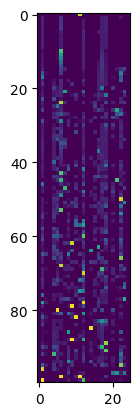

In [14]:
plt.imshow(new_rep[0:100,:])
plt.show()

In [15]:
Davis_data = open("/content/drive/MyDrive/Colab Notebooks/DAVIS_proteins.txt", "r")
print(Davis_data.read())

{"AAK1": "MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL", "ABL1(E255K)": "PFWKILNPLL

In [14]:
with open('/content/drive/MyDrive/Colab Notebooks/DAVIS_proteins.txt', 'r') as f:
    lines = f.readlines()

protein_sequence_dict = {}
for line in lines:
    split_line = line.rstrip('\n').split(',')
    protein_id = split_line[0]
    protein_sequence = split_line[1]
    protein_sequence_dict[protein_id] = protein_sequence

protein_sequences = []
for protein_id, protein_sequence in protein_sequence_dict.items():
    protein_sequences.append(protein_sequence)

protein_sequences_array = np.array(protein_sequences)

print(protein_sequences_array)

[' "ABL1(E255K)": "PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGKKESSRHGGPHCNVFVEHEALQRPVASDFEPQGLSEAARWNSKENLLAGPSENDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNHNGEWCEAQTKNGQGWVPSNYITPVNSLEKHSWYHGPVSRNAAEYLLSSGINGSFLVRESESSPGQRSISLRYEGRVYHYRINTASDGKLYVSSESRFNTLAELVHHHSTVADGLITTLHYPAPKRNKPTVYGVSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVNAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHLVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNKFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEKDYRMERPEGCPEKVYELMRACWQWNPSDRPSFAEIHQAFETMFQESSISDEVEKELGKQGVRGAVSTLLQAPELPTKTRTSRRAAEHRDTTDVPEMPHSKGQGESDPLDHEPAVSPLLPRKERGPPEGGLNEDERLLPKDKKTNLFSALIKKKKKTAPTPPKRSSSFREMDGQPERRGAGEEEGRDISNGALAFTPLDTADPAKSPKPSNGAGVPNGALRESGGSGFRSPHLWKKSSTLTSSRLATGEEEGGGSSSKRFLRSCSASCVPHGAKDTEWRSVTLPRDLQSTGRQFDSSTFGGHKSEKPALPRKRAGENRSDQVTRGTVTPPPRLVKKNEEAADEVFKDIMESSPGSSPPNLTPKPLRRQVTVAPASGLPHKEEAGKGSALGTPAAAEPVTPTSKAGSGAPGGTSKGPAEESRVRRHKHSSESPGRDKGKLSRLKPAPPPPPAASAGKAGGKPSQSPSQEAAGEAVLGAKTKATSLVDAVNSD

In [16]:
import collections
orderedDict = collections.OrderedDict()

In [17]:
Davis_dataset = json.load(open("/content/drive/MyDrive/Colab Notebooks/DAVIS_proteins.txt"),object_pairs_hook=collections.OrderedDict)
len(Davis_dataset)

442

In [38]:
unique_protein_seq = list(set(sequence for sequence in Davis_dataset.values()))
print(unique_protein_seq)
len(unique_protein_seq)

['MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSCRLELSTKNRERWCHEIQIMKKLNHANVVKACDVPEELNILIHDVPLLAMEYCSGGDLRKLLNKPENCCGLKESQILSLLSDIGSGIRYLHENKIIHRDLKPENIVLQDVGGKIIHKIIDLGYAKDVDQGSLCTSFVGTLQYLAPELFENKPYTATVDYWSFGTMVFECIAGYRPFLHHLQPFTWHEKIKKKDPKCIFACEEMSGEVRFSSHLPQPNSLCSLVVEPMENWLQLMLNWDPQQRGGPVDLTLKQPRCFVLMDHILNLKIVHILNMTSAKIISFLLPPDESLHSLQSRIERETGINTGSQELLSETGISLDPRKPASQCVLDGVRGCDSYMVYLFDKSKTVYEGPFASRSLSDCVNYIVQDSKIQLPIIQLRKVWAEAVHYVSGLKEDYSRLFQGQRAAMLSLLRYNANLTKMKNTLISASQQLKAKLEFFHKSIQLDLERYSEQMTYGISSEKMLKAWKEMEEKAIHYAEVGVIGYLEDQIMSLHAEIMELQKSPYGRRQGDLMESLEQRAIDLYKQLKHRPSDHSYSDSTEMVKIIVHTVQSQDRVLKELFGHLSKLLGCKQKIIDLLPKVEVALSNIKEADNTVMFMQGKRQKEIWHLLKIACTQSSARSLVGSSLEGAVTPQTSAWLPPTSAEHDHSLSCVVTPQDGETSAQMIEENLNCLGHLSTIIHEANEEQGNSMMNLDWSWLTE', 'MAGPCPRSGAERAGSCWQDPLAVALSRGRQLAAPPGRGCARSRPLSVVYVLTREPQPGLEPREGTEAEPLPLRCLREACAQVPRPRPPPQLRSLPFGTLELGDTAALDAFYNADVVVLEVSSSLVQPSLFYHLGVRESFSMTNNVLLCSQADLPDLQALREDVFQKNSDCVGSYTLIPYVVTATGRVLCGDAGLLRGLADGLVQAGVGTEALLTPLVGRLARLLEATPTDSCGYFRETIRRDIRQARER

379

'MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSCRLELSTKNRERWCHEIQIMKKLNHANVVKACDVPEELNILIHDVPLLAMEYCSGGDLRKLLNKPENCCGLKESQILSLLSDIGSGIRYLHENKIIHRDLKPENIVLQDVGGKIIHKIIDLGYAKDVDQGSLCTSFVGTLQYLAPELFENKPYTATVDYWSFGTMVFECIAGYRPFLHHLQPFTWHEKIKKKDPKCIFACEEMSGEVRFSSHLPQPNSLCSLVVEPMENWLQLMLNWDPQQRGGPVDLTLKQPRCFVLMDHILNLKIVHILNMTSAKIISFLLPPDESLHSLQSRIERETGINTGSQELLSETGISLDPRKPASQCVLDGVRGCDSYMVYLFDKSKTVYEGPFASRSLSDCVNYIVQDSKIQLPIIQLRKVWAEAVHYVSGLKEDYSRLFQGQRAAMLSLLRYNANLTKMKNTLISASQQLKAKLEFFHKSIQLDLERYSEQMTYGISSEKMLKAWKEMEEKAIHYAEVGVIGYLEDQIMSLHAEIMELQKSPYGRRQGDLMESLEQRAIDLYKQLKHRPSDHSYSDSTEMVKIIVHTVQSQDRVLKELFGHLSKLLGCKQKIIDLLPKVEVALSNIKEADNTVMFMQGKRQKEIWHLLKIACTQSSARSLVGSSLEGAVTPQTSAWLPPTSAEHDHSLSCVVTPQDGETSAQMIEENLNCLGHLSTIIHEANEEQGNSMMNLDWSWLTE'

In [53]:
def insert_space(list_str):
  new_list = []
  for string in list_str:
    new_string = " ".join(string)
    new_list.append(new_string)
  return new_list


print(insert_space(unique_protein_seq))

['M E R P P G L R P G A G G P W E M R E R L G T G G F G N V C L Y Q H R E L D L K I A I K S C R L E L S T K N R E R W C H E I Q I M K K L N H A N V V K A C D V P E E L N I L I H D V P L L A M E Y C S G G D L R K L L N K P E N C C G L K E S Q I L S L L S D I G S G I R Y L H E N K I I H R D L K P E N I V L Q D V G G K I I H K I I D L G Y A K D V D Q G S L C T S F V G T L Q Y L A P E L F E N K P Y T A T V D Y W S F G T M V F E C I A G Y R P F L H H L Q P F T W H E K I K K K D P K C I F A C E E M S G E V R F S S H L P Q P N S L C S L V V E P M E N W L Q L M L N W D P Q Q R G G P V D L T L K Q P R C F V L M D H I L N L K I V H I L N M T S A K I I S F L L P P D E S L H S L Q S R I E R E T G I N T G S Q E L L S E T G I S L D P R K P A S Q C V L D G V R G C D S Y M V Y L F D K S K T V Y E G P F A S R S L S D C V N Y I V Q D S K I Q L P I I Q L R K V W A E A V H Y V S G L K E D Y S R L F Q G Q R A A M L S L L R Y N A N L T K M K N T L I S A S Q Q L K A K L E F F H K S I Q L D L E R Y S E Q M T 

In [54]:
len(unique_protein_seq)

379

In [30]:
# unique_np = np.array(unique_protein_seq)
# unique_np = np.char.join(" ", unique_np)
# len(unique_np)

379

In [47]:
sample =  unique_protein_seq[0]
import time
start_time = time.time()
samp_prot = ''
all_ = []
for a in range(0, len(sample)):
  for i in range(0, len(sample)):
    if sample [i] ==0:
      break;
    samp_prot = samp_prot + sample[i]
    samp_prot = samp_prot + ' '

In [48]:
samp_prot

'M E R P P G L R P G A G G P W E M R E R L G T G G F G N V C L Y Q H R E L D L K I A I K S C R L E L S T K N R E R W C H E I Q I M K K L N H A N V V K A C D V P E E L N I L I H D V P L L A M E Y C S G G D L R K L L N K P E N C C G L K E S Q I L S L L S D I G S G I R Y L H E N K I I H R D L K P E N I V L Q D V G G K I I H K I I D L G Y A K D V D Q G S L C T S F V G T L Q Y L A P E L F E N K P Y T A T V D Y W S F G T M V F E C I A G Y R P F L H H L Q P F T W H E K I K K K D P K C I F A C E E M S G E V R F S S H L P Q P N S L C S L V V E P M E N W L Q L M L N W D P Q Q R G G P V D L T L K Q P R C F V L M D H I L N L K I V H I L N M T S A K I I S F L L P P D E S L H S L Q S R I E R E T G I N T G S Q E L L S E T G I S L D P R K P A S Q C V L D G V R G C D S Y M V Y L F D K S K T V Y E G P F A S R S L S D C V N Y I V Q D S K I Q L P I I Q L R K V W A E A V H Y V S G L K E D Y S R L F Q G Q R A A M L S L L R Y N A N L T K M K N T L I S A S Q Q L K A K L E F F H K S I Q L D L E R Y S E Q M T Y

In [49]:
for i in range(0,len(samp_prot), 30):
  new_sam_prot = samp_prot[max(0, i-60):i] + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + samp_prot[(i+30):min(i+60+30, len(samp_prot))]
  all_.append(new_sam_prot)
out = unmasker(all_)

In [56]:
all = []
for a in range(0,len(unique_protein_seq)):
  for i in range(0,len(unique_protein_seq[a]), 30):
    new_sam_prot = unique_protein_seq[a][max(0, i-60):i] + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + unique_protein_seq[a][(i+30):min(i+60+30, len(unique_protein_seq[a]))]
    all_.append(new_sam_prot)
out = unmasker(all_)

In [57]:
new_rep = np.zeros((len(samp_prot), 25))
for i in range(len(out)):
  for j in range(len(out[i])):
    print(out[i][j])
    score = [d1.get('score') for d1 in out[i][j]]
    letter = [protein_dict[d1.get('token_str')] for d1 in out[i][j]]
    new_rep[i*5+j, letter] = score
print(samp_prot)
print(time.time()-start_time)

[{'score': 0.8766101002693176, 'token': 21, 'token_str': 'M', 'sequence': '[CLS] M [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] E M R E R L G T G G F G N V C L Y Q H R E L D L K I A I K S [SEP]'}, {'score': 0.013633123598992825, 'token': 5, 'token_str': 'L', 'sequence': '[CLS] L [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] E M R E R L G T G G F G N V C L Y Q H R E L D L K I A I K S [SEP]'}, {'score': 0.011492570862174034, 'token': 10, 'token_str': 'S', 'sequence': '[CLS] S [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] E M R E R L G T G G F G N V C L Y Q H R E L D L K I A I K S [SEP]'}, {'score': 0.011282408609986305, 'token': 8, 'token_str': 'V', 'sequence': '[CLS] V [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] E M R E R L G T G G F G N V C L Y Q H R E L D L K I A I K S [SEP]'},

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import matplotlib.pyplot as plt
plt.imshow(new_rep[0:100,:])
plt.show()

In [28]:
# import io
# import collections

# def unique_protein_sequences(filename):
#     with io.open('/content/proteinsfromDavis.txt') as f:
#         protein_sequences = {}
#         for line in f:
#             if line[0] != ">":
#                 continue
#             protein_sequence = line[1:].strip()
#             protein_sequences[protein_sequence] = None

#     unique_protein = set(protein_sequences.keys())

#     for protein_sequence in unique_protein:
#         print(protein_sequence)
#     return unique_protein



# def get_max_length_of_strings(list_of_strings):
#   max_lengths = []
#   for string in list_of_strings:
#     max_length = len(string)
#     max_lengths.append(max_length)

#   return max_lengths


# if __name__ == "__main__":
#   list_of_strings = ["This is a long string", "This is a short string",
#                      "This is another long string"]
#   max_lengths = get_max_length_of_strings(list_of_strings)
#   print(max_lengths)

In [ ]:
sample =  train_prots[0]
import time
start_time = time.time()
samp_prot = ''
all_ = []
for i in range(0, len(sample)):
  if sample [i] ==0:
    break;
  samp_prot = samp_prot + protein_dict_[sample[i]]
  samp_prot = samp_prot + ' '

from transformers import BertForMaskedLM, BertTokenizer, pipeline
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False )
model = BertForMaskedLM.from_pretrained("Rostlab/prot_bert")
extractor = pipeline(model=model, task="feature-extraction", tokenizer=tokenizer)
result = extractor(samp_prot, return_tensors=True)

#samp_prot =-7D L I P T S S K L V V  D T S L Q V K K A F F A L V T'
for i in range(0,len(samp_prot), 30):
  new_sam_prot = samp_prot[max(0, i-60):i] + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + samp_prot[(i+30):min(i+60+30, len(samp_prot))]
  all_.append(new_sam_prot)
out = unmasker(all_)

import numpy as np

new_rep = np.zeros((len(sample), 25))
for i in range(len(out)):
  for j in range(len(out[i])):
    print(out[i][j])
    score = [d1.get('score') for d1 in out[i][j]]
    letter = [protein_dict[d1.get('token_str')] for d1 in out[i][j]]
    new_rep[i*5+j, letter] = score
print(samp_prot)
print(time.time()-start_time)
import matplotlib.pyplot as plt
plt.imshow(new_rep[0:100,:])
plt.show()


In [ ]:
print(result.shape)